## Import libraries ==> Load data ==>  ==> Build Neural Network ==> Conclude conclusion

In [1]:
import numpy as np
import h5py as h5
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
warnings.filterwarnings('ignore')
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense,Dropout, BatchNormalization, Activation
from keras import optimizers
np.random.seed(7071)
import datetime
%matplotlib inline

Using TensorFlow backend.


### Load data

In [2]:
data1=h5.File("C:\\Users\\SVHN_single_grey1.h5",'r')

In [3]:
print("Keys: %s" % data1.keys())

Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [4]:
#Load the training, testing, and validation data
X_train=data1['X_train']
X_test=data1['X_test']
X_val=data1['X_val']
y_train=data1['y_train']
y_test=data1['y_test']
y_val=data1['y_val']

## Dissect X & y in more detail

In [5]:
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


## Unless I see it I just can't beleive it

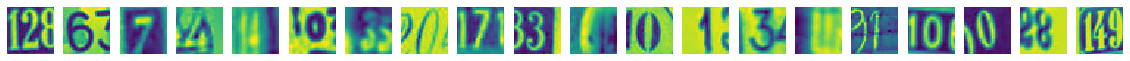

label for each of the above image: [2 6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4]


In [6]:
# visualizing the first 20 images in the TRAIN dataset and their labels
#In this project we will use dataset with images centred around a single digit 
#(many of the images do contain some distractors at the sides).

plt.figure(figsize=(20, 1))
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X_train[i].reshape(32, 32)) #, cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:20]))

In [7]:
X_train.shape

(42000, 32, 32)

## Neural network only understands Vector hence X reshape is needed

In [8]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

In [9]:
print(y_train[0:20])
print(y_train.dtype)

[2 6 7 4 4 0 3 0 7 3 1 0 1 3 1 1 0 0 8 4]
uint8


In [10]:
num_classes = 10 ## No. of UNIQUE values depenedent Y can have . Here values range from 0 to 9
y_train = keras.utils.to_categorical(y_train, num_classes) ## covert target to categorical 
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [11]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


## (Flavour 1) Basic Neural Network with only layers

In [12]:
model1 = keras.Sequential()
model1.add(Dense(512,kernel_initializer='he_normal', input_shape=(1024,)))
model1.add(Activation('relu'))
model1.add(Dense(256,kernel_initializer='he_normal'))
model1.add(Activation('relu'))
model1.add(Dense(128,kernel_initializer='he_normal'))
model1.add(Activation('relu'))
model1.add(Dense(64,kernel_initializer='he_normal'))
model1.add(Activation('relu'))
model1.add(Dense(32,kernel_initializer='he_normal'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.summary()
model1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # compile model with training parameters

batch_size = 200
epochs = 50

startTime = datetime.datetime.now()

history = model1.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=batch_size, epochs=epochs, validation_split=.1)
train_result1 = model1.evaluate(X_train, y_train)
test_result1 = model1.evaluate(X_test, y_test)
val_result1 = model1.evaluate(X_val, y_val)

print('TRAIN_acc using BatchNorm and Dropout adam SGD : ', train_result1[1])
print('VAL_acc using BatchNorm and Dropout adam SGD: ', val_result1[1])
print('TEST_acc using BatchNorm and Dropout adam SGD: ', test_result1[1])

print("Total time taken for execution of this code = "+str(datetime.datetime.now() - startTime))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

42000/42000 [==============================] - 5s 108us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 46/50
42000/42000 [==============================] - 5s 110us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 47/50
42000/42000 [==============================] - 5s 116us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 48/50
42000/42000 [==============================] - 5s 110us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 49/50
42000/42000 [==============================] - 5s 108us/step - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1000
Epoch 50/50
60000/60000 [==============================] - 5s 82us/step
TRAIN_acc using BatchNorm and Dropout adam SGD :  0.09966666996479034
VAL_acc using BatchNorm and Dropout adam SGD:  0.10000000149011612
TEST_acc using BatchNorm and Dropout adam SGD:  0.1007777750492096
Total time taken for 

## Neural Network : Lets complicate the matter :-)

## (Flavour 2) Finding best hyper parameters using GridSearchCV & KERAsClassifier

In [25]:
# Function to create model, required for KerasClassifier
# Model Regularization

def create_model(learn_rate, momentum,batch_size,epochs,optimizer,
                 init_mode,dropout_rate):
    model2 = Sequential()
    model2.add(Dense(512,kernel_initializer='he_normal', input_dim=1024))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(dropout_rate))    

    model2.add(Dense(256, kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(dropout_rate))    

    model2.add(Dense(128, kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(dropout_rate))    

    model2.add(Dense(64, kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(dropout_rate))    

    model2.add(Dense(32, kernel_initializer='he_normal'))
    model2.add(BatchNormalization())
    model2.add(Activation('relu'))
    model2.add(Dropout(dropout_rate))    
    
    model2.add(Dense(10))
    model2.add(Activation('softmax'))
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model2

# create model
model2 = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [20,40,100]
epochs = [30, 50,100]
learn_rate = [0.0001,0.001, 0.0002, 0.3]
momentum = [0.1, 0.4, 0.6, 0.8, 0.9]
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
optimizer = ['SGD','Adam', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
init_mode = ['uniform','he_normal','lecun_uniform'] #, 'normal', 'zero', 'glorot_normal', 'glorot_uniform',  'he_uniform']

param_grid = dict(learn_rate=learn_rate, momentum=momentum,batch_size=batch_size, epochs=epochs, optimizer=optimizer,
                 init_mode=init_mode,dropout_rate=dropout_rate)

startTime = datetime.datetime.now()
    
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3) ## n_jobs=-1 means no parallel jobs
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print("Total time taken for execution of this code = "+str(datetime.datetime.now() - startTime))

Best: 0.780333 using {'batch_size': 20, 'dropout_rate': 0.2, 'epochs': 30, 'init_mode': 'uniform', 'learn_rate': 0.0001, 'momentum': 0.1, 'optimizer': 'SGD'}
0.780333 (0.012978) with: {'batch_size': 20, 'dropout_rate': 0.2, 'epochs': 30, 'init_mode': 'uniform', 'learn_rate': 0.0001, 'momentum': 0.1, 'optimizer': 'SGD'}
0.778357 (0.009250) with: {'batch_size': 20, 'dropout_rate': 0.2, 'epochs': 30, 'init_mode': 'uniform', 'learn_rate': 0.0001, 'momentum': 0.1, 'optimizer': 'Adam'}
Total time taken for execution of this code = 1:22:10.686593


## Batch Normalization & Dropout : REGULARIZATION

## (Flavour 3) SGD

In [14]:
model3 = keras.Sequential()
model3.add(Dense(512,kernel_initializer='he_normal', input_shape=(1024,)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(256,kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(128,kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(64,kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(32,kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.5))

model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.summary()

startTime = datetime.datetime.now()

aDam = optimizers.adam(lr = 0.0003)
model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # compile model with training paramete
batch_size = 200
epochs = 100
history = model3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size=batch_size, epochs=epochs, validation_split=.1)

train_result3 = model3.evaluate(X_train, y_train)
test_result3 = model3.evaluate(X_test, y_test)
val_result3 = model3.evaluate(X_val, y_val)

print("Total time taken for execution of Model3 execution = "+str(datetime.datetime.now() - startTime))

print('TRAIN_acc using BatchNorm and Dropout SGD : ', train_result3[1])
print('VAL_acc using BatchNorm and Dropout SGD: ', val_result3[1])
print('TEST_acc using BatchNorm and Dropout SGD: ', test_result3[1])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_13 (Activation)   (None, 256)              

42000/42000 [==============================] - 6s 154us/step - loss: 2.2956 - accuracy: 0.1142 - val_loss: 2.2936 - val_accuracy: 0.1151
Epoch 34/100
42000/42000 [==============================] - 6s 154us/step - loss: 2.2942 - accuracy: 0.1151 - val_loss: 2.2917 - val_accuracy: 0.1188
Epoch 35/100
42000/42000 [==============================] - 7s 178us/step - loss: 2.2931 - accuracy: 0.1160 - val_loss: 2.2910 - val_accuracy: 0.1191
Epoch 36/100
42000/42000 [==============================] - 7s 166us/step - loss: 2.2906 - accuracy: 0.1188 - val_loss: 2.2891 - val_accuracy: 0.1216
Epoch 37/100
42000/42000 [==============================] - 7s 159us/step - loss: 2.2883 - accuracy: 0.1205 - val_loss: 2.2872 - val_accuracy: 0.1233
Epoch 38/100
42000/42000 [==============================] - 6s 153us/step - loss: 2.2856 - accuracy: 0.1229 - val_loss: 2.2839 - val_accuracy: 0.1271
Epoch 39/100
42000/42000 [==============================] - 6s 153us/step - loss: 2.2847 - accuracy: 0.1200 - val

Epoch 88/100
42000/42000 [==============================] - 7s 161us/step - loss: 2.0785 - accuracy: 0.1874 - val_loss: 2.0576 - val_accuracy: 0.1959
Epoch 89/100
42000/42000 [==============================] - 6s 154us/step - loss: 2.0741 - accuracy: 0.1890 - val_loss: 2.0711 - val_accuracy: 0.1915
Epoch 90/100
42000/42000 [==============================] - 6s 154us/step - loss: 2.0760 - accuracy: 0.1857 - val_loss: 2.0744 - val_accuracy: 0.1892
Epoch 91/100
42000/42000 [==============================] - 6s 152us/step - loss: 2.0682 - accuracy: 0.1895 - val_loss: 2.0550 - val_accuracy: 0.1962
Epoch 92/100
42000/42000 [==============================] - 6s 153us/step - loss: 2.0640 - accuracy: 0.1917 - val_loss: 2.0468 - val_accuracy: 0.1988
Epoch 93/100
42000/42000 [==============================] - 7s 160us/step - loss: 2.0642 - accuracy: 0.1909 - val_loss: 2.0270 - val_accuracy: 0.2045
Epoch 94/100
42000/42000 [==============================] - 7s 159us/step - loss: 2.0617 - accuracy:

## ADAM

In [15]:
model4 = keras.Sequential()
model4.add(Dense(512,kernel_initializer='he_normal', input_shape=(1024,)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))


model4.add(Dense(256,kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(128,kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(64,kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))


model4.add(Dense(32,kernel_initializer='he_normal'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))

model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

startTime = datetime.datetime.now()

aDam = optimizers.adam(lr = 0.0001)
model4.compile(loss='categorical_crossentropy', optimizer=aDam, metrics=['accuracy']) # compile model with training paramete
batch_size = 200
epochs = 100
history = model4.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size=batch_size, epochs=epochs, validation_split=.1)

train_result4 = model4.evaluate(X_train, y_train)
test_result4 = model4.evaluate(X_test, y_test)
val_result4 = model4.evaluate(X_val, y_val)

print("Total time taken for execution of model4 execution = "+str(datetime.datetime.now() - startTime))

print('TRAIN_acc using BatchNorm and Dropout ADAM : ', train_result4[1])
print('VAL_acc using BatchNorm and Dropout ADAM : ', val_result4[1])
print('TEST_acc using BatchNorm and Dropout ADAM : ', test_result4[1])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
activation_19 (Activation)   (None, 256)              

42000/42000 [==============================] - 9s 215us/step - loss: 1.7980 - accuracy: 0.3119 - val_loss: 1.6049 - val_accuracy: 0.4384
Epoch 34/100
42000/42000 [==============================] - 9s 213us/step - loss: 1.7686 - accuracy: 0.3262 - val_loss: 1.5181 - val_accuracy: 0.4848
Epoch 35/100
42000/42000 [==============================] - 9s 214us/step - loss: 1.7391 - accuracy: 0.3376 - val_loss: 1.5285 - val_accuracy: 0.4733
Epoch 36/100
42000/42000 [==============================] - 9s 209us/step - loss: 1.7175 - accuracy: 0.3470 - val_loss: 1.4958 - val_accuracy: 0.4997
Epoch 37/100
42000/42000 [==============================] - 9s 226us/step - loss: 1.6850 - accuracy: 0.3578 - val_loss: 1.4210 - val_accuracy: 0.5156
Epoch 38/100
42000/42000 [==============================] - 8s 195us/step - loss: 1.6671 - accuracy: 0.3657 - val_loss: 1.4118 - val_accuracy: 0.5208
Epoch 39/100
42000/42000 [==============================] - 8s 195us/step - loss: 1.6358 - accuracy: 0.3826 - val

Epoch 88/100
42000/42000 [==============================] - 8s 200us/step - loss: 1.1379 - accuracy: 0.6101 - val_loss: 0.8651 - val_accuracy: 0.7375
Epoch 89/100
42000/42000 [==============================] - 8s 192us/step - loss: 1.1415 - accuracy: 0.6118 - val_loss: 0.9202 - val_accuracy: 0.7164
Epoch 90/100
42000/42000 [==============================] - 9s 202us/step - loss: 1.1273 - accuracy: 0.6148 - val_loss: 0.8727 - val_accuracy: 0.7314
Epoch 91/100
42000/42000 [==============================] - 8s 199us/step - loss: 1.1256 - accuracy: 0.6187 - val_loss: 0.8606 - val_accuracy: 0.7343
Epoch 92/100
42000/42000 [==============================] - 8s 197us/step - loss: 1.1229 - accuracy: 0.6190 - val_loss: 0.8496 - val_accuracy: 0.7387
Epoch 93/100
42000/42000 [==============================] - 8s 192us/step - loss: 1.1118 - accuracy: 0.6226 - val_loss: 0.8864 - val_accuracy: 0.7256
Epoch 94/100
42000/42000 [==============================] - 8s 193us/step - loss: 1.1042 - accuracy:

## Batch Normalization without Backout - SGD

In [16]:
model5 = keras.Sequential()
model5.add(Dense(512,kernel_initializer='he_normal', input_shape=(1024,)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(256,kernel_initializer='he_normal'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(128,kernel_initializer='he_normal'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(64,kernel_initializer='he_normal'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(32,kernel_initializer='he_normal'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))

model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.summary()

startTime = datetime.datetime.now()

aDam = optimizers.adam(lr = 0.0003)
model5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # compile model with training paramete
batch_size = 200
epochs = 100
history = model5.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size=batch_size, epochs=epochs, validation_split=.1)

train_result5 = model5.evaluate(X_train, y_train)
test_result5 = model5.evaluate(X_test, y_test)
val_result5 = model5.evaluate(X_val, y_val)

print('TRAIN_acc using BatchNorm SGD : ', train_result5[1])
print('VAL_acc using BatchNorm SGD: ', val_result5[1])
print('TEST_acc using BatchNorm SGD: ', test_result5[1])

print("Total time taken for execution of model5 execution = "+str(datetime.datetime.now() - startTime))


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)              

Epoch 38/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.2862 - accuracy: 0.9163 - val_loss: 0.5824 - val_accuracy: 0.8209
Epoch 39/100
42000/42000 [==============================] - 6s 143us/step - loss: 0.2787 - accuracy: 0.9157 - val_loss: 0.6055 - val_accuracy: 0.8157
Epoch 40/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.2723 - accuracy: 0.9183 - val_loss: 0.6692 - val_accuracy: 0.7933
Epoch 41/100
42000/42000 [==============================] - 6s 134us/step - loss: 0.2616 - accuracy: 0.9226 - val_loss: 0.6475 - val_accuracy: 0.8077
Epoch 42/100
42000/42000 [==============================] - 6s 138us/step - loss: 0.2533 - accuracy: 0.9253 - val_loss: 0.7405 - val_accuracy: 0.7826
Epoch 43/100
42000/42000 [==============================] - 6s 142us/step - loss: 0.2520 - accuracy: 0.9248 - val_loss: 0.5996 - val_accuracy: 0.8183
Epoch 44/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.2429 - accuracy:

42000/42000 [==============================] - 6s 134us/step - loss: 0.0712 - accuracy: 0.9807 - val_loss: 0.4958 - val_accuracy: 0.8693
Epoch 93/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0787 - accuracy: 0.9774 - val_loss: 0.4862 - val_accuracy: 0.8715
Epoch 94/100
42000/42000 [==============================] - 6s 143us/step - loss: 0.0718 - accuracy: 0.9805 - val_loss: 0.5390 - val_accuracy: 0.8611
Epoch 95/100
42000/42000 [==============================] - 6s 145us/step - loss: 0.0710 - accuracy: 0.9808 - val_loss: 0.5344 - val_accuracy: 0.8609
Epoch 96/100
42000/42000 [==============================] - 6s 137us/step - loss: 0.0715 - accuracy: 0.9795 - val_loss: 0.6766 - val_accuracy: 0.8363
Epoch 97/100
42000/42000 [==============================] - 6s 138us/step - loss: 0.0670 - accuracy: 0.9814 - val_loss: 0.6218 - val_accuracy: 0.8497
Epoch 98/100
42000/42000 [==============================] - 6s 136us/step - loss: 0.0680 - accuracy: 0.9815 - val

# Batch Normalization without Dropout - ADAM

In [17]:
model6 = keras.Sequential()
model6.add(Dense(512,kernel_initializer='he_normal', input_shape=(1024,)))
model6.add(BatchNormalization())
model6.add(Activation('relu'))

model6.add(Dense(256,kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(Activation('relu'))

model6.add(Dense(128,kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(Activation('relu'))

model6.add(Dense(64,kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(Activation('relu'))

model6.add(Dense(32,kernel_initializer='he_normal'))
model6.add(BatchNormalization())
model6.add(Activation('relu'))

model6.add(Dense(10))
model6.add(Activation('softmax'))
model6.summary()

startTime = datetime.datetime.now()

aDam = optimizers.adam(lr = 0.0001)
model6.compile(loss='categorical_crossentropy', optimizer=aDam, metrics=['accuracy']) # compile model with training paramete
batch_size = 200
epochs = 100
history = model6.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size=batch_size, epochs=epochs, validation_split=.1)

train_result6 = model6.evaluate(X_train, y_train)
test_result6 = model6.evaluate(X_test, y_test)
val_result6 = model6.evaluate(X_val, y_val)

print('TRAIN_acc using BatchNorm and Dropout ADAM : ', train_result6[1])
print('VAL_acc using BatchNorm and Dropout ADAM : ', val_result6[1])
print('TEST_acc using BatchNorm and Dropout ADAM : ', test_result6[1])

print("Total time taken for execution of model5 execution = "+str(datetime.datetime.now() - startTime))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
activation_30 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
activation_31 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)              

Epoch 38/100
42000/42000 [==============================] - 9s 214us/step - loss: 0.1516 - accuracy: 0.9568 - val_loss: 0.7389 - val_accuracy: 0.7965
Epoch 39/100
42000/42000 [==============================] - 9s 204us/step - loss: 0.1493 - accuracy: 0.9578 - val_loss: 0.5704 - val_accuracy: 0.8317
Epoch 40/100
42000/42000 [==============================] - 8s 188us/step - loss: 0.1437 - accuracy: 0.9589 - val_loss: 0.6224 - val_accuracy: 0.8195
Epoch 41/100
42000/42000 [==============================] - 7s 175us/step - loss: 0.1354 - accuracy: 0.9619 - val_loss: 0.5715 - val_accuracy: 0.8303
Epoch 42/100
42000/42000 [==============================] - 8s 180us/step - loss: 0.1304 - accuracy: 0.9635 - val_loss: 0.5684 - val_accuracy: 0.8318
Epoch 43/100
42000/42000 [==============================] - 7s 177us/step - loss: 0.1223 - accuracy: 0.9656 - val_loss: 0.6492 - val_accuracy: 0.8150
Epoch 44/100
42000/42000 [==============================] - 7s 175us/step - loss: 0.1194 - accuracy:

42000/42000 [==============================] - 7s 175us/step - loss: 0.0440 - accuracy: 0.9871 - val_loss: 0.7061 - val_accuracy: 0.8289
Epoch 93/100
42000/42000 [==============================] - 7s 177us/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.6333 - val_accuracy: 0.8439
Epoch 94/100
42000/42000 [==============================] - 8s 183us/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 1.0586 - val_accuracy: 0.7840
Epoch 95/100
42000/42000 [==============================] - 7s 175us/step - loss: 0.0410 - accuracy: 0.9877 - val_loss: 0.5476 - val_accuracy: 0.8645
Epoch 96/100
42000/42000 [==============================] - 8s 187us/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.8703 - val_accuracy: 0.8007
Epoch 97/100
42000/42000 [==============================] - 8s 180us/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.7999 - val_accuracy: 0.8258
Epoch 98/100
42000/42000 [==============================] - 7s 178us/step - loss: 0.0415 - accuracy: 0.9880 - val

In [18]:
Compare = [[train_result6[1],test_result6[1],val_result6[1]],
           [train_result5[1],test_result5[1],val_result5[1]],
           [train_result4[1],test_result4[1],val_result4[1]],
           [train_result3[1],test_result3[1],val_result3[1]],
          # [train_result2[1],test_result2[1],val_result2[1]],
           [train_result1[1],test_result1[1],val_result1[1]],
          ]

modelRes = pd.DataFrame( Compare,
                        columns=['Train','Test','Validation'],
                        index=['Adam (BatchNorm-Dropout)','SGD (BatchNorm-Dropout)',
                               'Adam (BatchNorm+Dropout)','SGD (BatchNorm+Dropout)',#'GridSearchCV',
                               'Basic NN'] )

def plotNN():
    fig, ax = plt.subplots(1,1, figsize = (15,5))
    ax.plot(modelRes.index.values, modelRes['Train'],label='Training')
    ax.plot(modelRes.index.values, modelRes['Test'],label='Testing')
    ax.plot(modelRes.index.values, modelRes['Validation'],label='Validation')
    ax.set_xlabel('Neural Network')
    ax.set_ylabel('Accuracy %')
    plt.legend()
    plt.show()

## Conclusion !!!
## Numbers generated by code so far 

                             Train      Test  Validation
Adam (BatchNorm-Dropout)  0.868548  0.738556    0.829550
SGD (BatchNorm-Dropout)   0.938238  0.765722    0.886483
Adam (BatchNorm+Dropout)  0.751952  0.734333    0.746667
SGD (BatchNorm+Dropout)   0.202452  0.202444    0.202450
Basic NN                  0.099667  0.100778    0.100000


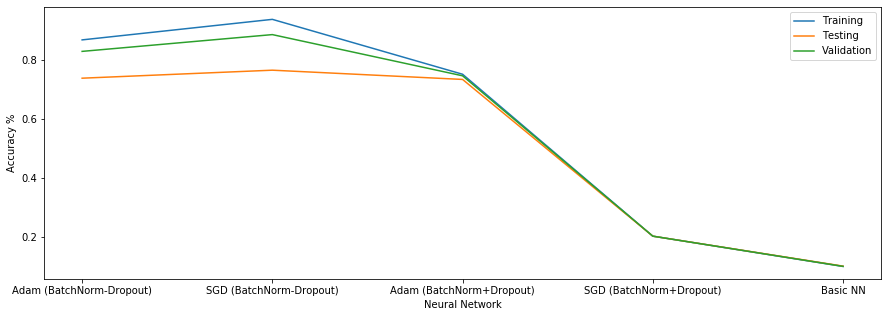

In [24]:
print(modelRes)
plotNN()

## "SGD" optimizer with Batch Normalization layers minus  Dropout layers has scored high in all Train, Test & Validation dataset.  Basic Neural Network (with no fancy layers ) has scored lowest scores :-)                                                                                                  Now the fun part ... Lets scrutinize resultset . I will randomly check & match result set with trainset. 

### Test Case 1 (SGD" optimizer with Batch Normalization layers minus Dropout layers)

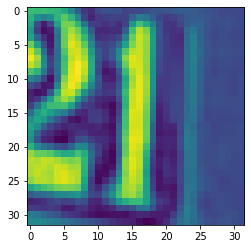

In [39]:
plt.imshow(X_test[13461].reshape(32,32))

In [40]:
model5.predict_classes(X_test)[13461] ## "SGD" optimizer with Batch Normalization layers minus Dropout layers

1

### Test Case 2 (Adam optimizer with Batch Normalization layers minus Dropout layers)

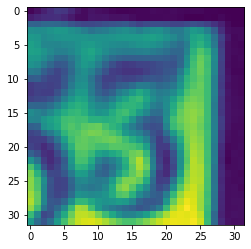

In [44]:
plt.imshow(X_test[1111].reshape(32,32))

In [45]:
model6.predict_classes(X_test)[1111] ## Adam optimizer with Batch Normalization layers minus Dropout layers

3

### Test Case 3 : Since model/s accuracy is not 100% than it should return wrong predictions as well. 

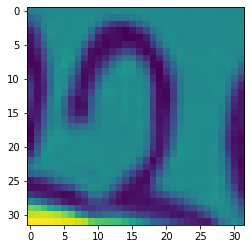

In [46]:
plt.imshow(X_test[58].reshape(32,32))

In [47]:
model5.predict_classes(X_test)[58]

0

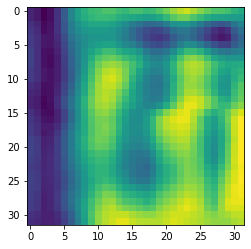

In [48]:
plt.imshow(X_test[4724].reshape(32,32))

In [49]:
model6.predict_classes(X_test)[4724]

4

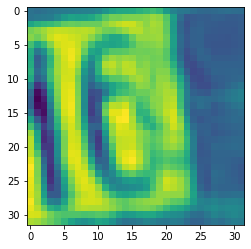

In [50]:
plt.imshow(X_test[9999].reshape(32,32))

In [51]:
model6.predict_classes(X_test)[9999]

0

## Key Take aways !!!!
### 1) GridSearchCV using KerasClassifier took approx. 1.22hrs with accuracy score 78%
### 2) Dropout is always not a good criteria to be used as regularization parameter.
### 3) SGD has scored highest in image dataset. 
### 4) Adam / SGD both can used as Neural Network Image Classifier.
### 5) Like Humans Computer is not also always right. Test case 3 is the proof .